# **IE7275 Data Mining in Engineering**
# **Fall 2025 semester**
### -- STUDENT VERSION --

---
#### **Guidelines for Completing and Submitting This Notebook**

Please follow these instructions carefully. Completing all parts of this notebook is required to receive full credit:

#### **You must:**
- **Answer all questions** and reflection tasks using your own words.
- **Summarize every reflection task** clearly and completely.
- **Fill out all missing code cells** — do not leave any code blocks empty.
- **Run your notebook** to ensure that all outputs and visualizations are generated and visible.
- **Convert your completed notebook** to **PDF** or **HTML** format before submission.
- **Submit the file to Canvas** before the deadline.

#### **Academic Integrity Reminder**:
- You must complete this notebook individually.
- Do not copy answers or code from classmates, online sources, or use tools like **ChatGPT** or other **AI writing or code generation tools**.
- Keep in mind that if you use such tools, your answer may be **identical or highly similar** to others who do the same — in this case, we will treat it as copying and apply a **50% penalty** to your assignment grade.

By submitting this notebook, you confirm that all work is your own and that you have followed these guidelines.


---



## **Module 4: Association Rule Mining and Recommendation Systems (Part 1)**

This module explores techniques for discovering interesting relationships and patterns in large datasets through **association rule mining** and applying these insights to build **recommendation systems**.

You will learn how to analyze transactional data, extract frequent itemsets using algorithms like Apriori and FP-Growth, and evaluate rules using metrics such as support, confidence, and lift. The module also covers advanced topics like rule constraints, visualization of association patterns, and handling complex multi-level rules.

In addition, you will study recommendation system fundamentals, including association-based recommenders, collaborative filtering, and hybrid approaches that combine multiple methods for improved accuracy.

By the end of this module, you will be able to mine meaningful associations from data and leverage them to design effective recommendation engines used widely in e-commerce, marketing, and user personalization.

---

#### **Module 4.1: Introduction to Association Rule Mining**

**Association Rule Mining** is a data mining technique used to discover meaningful relationships, patterns, and correlations among items in large datasets, typically transactional data. The primary goal is to generate **rules** that predict the occurrence of one or more items based on the presence of other items. This is widely used in market basket analysis, recommendation systems, and customer behavior analytics.

---

#### **Why Association Rules Matter**
Association rules help uncover hidden patterns that are not obvious from raw data.  
For example, in retail:
> Customers who buy **bread** and **butter** are also likely to buy **jam**.

Such insights can guide:
- **Product Placement** — placing complementary products near each other.
- **Cross-Selling** — recommending related products to customers.
- **Marketing Campaigns** — creating targeted promotions for specific item combinations.

---

#### **Key Concepts and Definitions**

1. **Itemset**  
   - A collection of one or more items.
   - **k-itemset**: An itemset containing exactly $(k)$ items.  
     Example: $(\{ \text{bread}, \text{butter} \})$ is a 2-itemset.

2. **Support ($ \text{supp}(A) $)**  
   - The proportion of transactions that contain the itemset $(A)$.  
   - Formula:  
     $
     \text{Support}(A) = \frac{\text{Number of transactions containing } A}{\text{Total number of transactions}}
     $  
   - Measures **how frequently** an itemset appears in the dataset.

3. **Confidence ($ \text{conf}(A \rightarrow B) $)**  
   - The probability of finding itemset $(B)$ in transactions that contain $(A)$.  
   - Formula:  
     $
     \text{Confidence}(A \rightarrow B) = \frac{\text{Support}(A \cup B)}{\text{Support}(A)}
     $  
   - Indicates the **reliability** of the rule.

4. **Lift ($ \text{lift}(A \rightarrow B) $)**  
   - The ratio of the observed support of $(A)$ and $(B)$ appearing together to the expected support if they were independent.  
   - Formula:  
     $
     \text{Lift}(A \rightarrow B) = \frac{\text{Support}(A \cup B)}{\text{Support}(A) \times \text{Support}(B)}
     $  
   - **Lift > 1**: Positive association (items occur together more often than expected by chance).  
   - **Lift = 1**: No association (independent).  
   - **Lift < 1**: Negative association (items occur together less often than expected).

---

#### **Example Interpretation**
Rule: $(\{\text{Bread}, \text{Butter}\} \rightarrow \{\text{Jam}\})$  
- **Support**: 5% — This rule applies to 5% of all transactions.  
- **Confidence**: 60% — In 60% of cases where bread and butter are bought together, jam is also bought.  
- **Lift**: 2.0 — Buying bread and butter together makes jam purchases twice as likely compared to random chance.

---

#### **Step-by-Step Process in Association Rule Mining**
1. **Identify Frequent Itemsets** — Use algorithms like Apriori, FP-Growth, or Eclat to find itemsets above a minimum support threshold.
2. **Generate Rules** — From frequent itemsets, create rules that meet minimum confidence criteria.
3. **Evaluate Rules** — Use metrics such as support, confidence, and lift to determine rule usefulness.
4. **Apply Insights** — Integrate the rules into decision-making, marketing, and product recommendations.

---

#### **Important Considerations**
- Association rules **do not imply causation** — they only describe statistical relationships.
- Choosing appropriate **support** and **confidence** thresholds is essential to balance rule quantity and quality.
- Very high support may ignore rare but valuable patterns; very low support may produce too many trivial or noisy rules.
- Domain knowledge is crucial to ensure discovered rules are actionable and relevant.

---


#### **Exercise 1: Exploring Basic Metrics of Association Rules**

#### Objective:
Learn how to extract frequent itemsets and calculate the basic metrics of association rules—support, confidence, and lift—using a transactional dataset.

#### Instructions:

1. **Load the Dataset**  
   Use the built-in **Online Retail** dataset or simulate a small transactional dataset. Each transaction should consist of a list of items purchased together.

2. **Preprocess the Data**  
   - Convert the dataset into a format suitable for association rule mining (i.e., a binary-encoded DataFrame where rows represent transactions and columns represent items).
   - Use the `TransactionEncoder` from `mlxtend.preprocessing`.

3. **Generate Frequent Itemsets**  
   - Apply the **Apriori algorithm** using `mlxtend.frequent_patterns.apriori()` to identify frequent itemsets with a minimum support of 0.2.

4. **Generate Association Rules**  
   - Use `mlxtend.frequent_patterns.association_rules()` to derive rules from the frequent itemsets.
   - Calculate the **support**, **confidence**, and **lift** for each rule.

5. **Interpret the Results**  
   - Print out the top 5 rules sorted by lift.
   - Discuss one rule you find interesting and explain what it means in terms of item relationships.

---


In [ ]:
# Install mlxtend if not already installed
#!pip install mlxtend


In [3]:
# Step 1: Import required libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [4]:
# Step 2: Create a simulated transaction dataset
transactions = [
    ['bread', 'butter', 'jam'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'butter'],
    ['jam', 'bread'],
    ['milk', 'jam'],
    ['bread', 'butter'],
    ['bread', 'jam'],
    ['milk', 'butter'],
    ['bread', 'milk', 'butter', 'jam']
]


In [5]:
# Step 3: Encode the dataset
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)
df

,bread,butter,jam,milk
0,True,True,True,False
1,True,True,False,False
2,True,False,False,True
3,True,True,False,True
4,True,False,True,False
5,False,False,True,True
6,True,True,False,False
7,True,False,True,False
8,False,True,False,True
9,True,True,True,True


In [6]:
# Step 4: Generate frequent itemsets using Apriori
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.8,(bread)
1,0.6,(butter)
2,0.5,(jam)
3,0.5,(milk)
4,0.5,"(butter, bread)"
5,0.4,"(bread, jam)"
6,0.3,"(milk, bread)"
7,0.2,"(butter, jam)"
8,0.3,"(milk, butter)"
9,0.2,"(milk, jam)"


In [7]:
# Step 5: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

In [8]:
# Step 6: Display the top 5 rules by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(5)
print("Top 5 association rules sorted by lift:")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Top 5 association rules sorted by lift:
     antecedents    consequents  support  confidence      lift
6  (butter, jam)        (bread)      0.2    1.000000  1.250000
7        (bread)  (butter, jam)      0.2    0.250000  1.250000
8  (milk, bread)       (butter)      0.2    0.666667  1.111111
9       (butter)  (milk, bread)      0.2    0.333333  1.111111
0       (butter)        (bread)      0.5    0.833333  1.041667


In [9]:
# Step 7: Optional interpretation example
print("\nInterpretation example:")
example_rule = top_rules.iloc[0]
print(f"If a customer buys {list(example_rule['antecedents'])}, they are likely to also buy {list(example_rule['consequents'])} with a confidence of {example_rule['confidence']:.2f} and a lift of {example_rule['lift']:.2f}.")



Interpretation example:
If a customer buys ['butter', 'jam'], they are likely to also buy ['bread'] with a confidence of 1.00 and a lift of 1.25.


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

#### **Module 4.2: Transactional Data and Binary Encoding**

Association rule mining requires data to be in a specific format called **transactional data**, where each record (transaction) contains a set of items purchased or occurring together.

To efficiently mine rules, this data is typically converted into a **binary encoded matrix** (also called one-hot encoding), where:
- Rows represent individual transactions,
- Columns represent all possible items,
- Each cell contains 1 if the item is present in the transaction, or 0 otherwise.

This format enables algorithms like Apriori and FP-Growth to quickly identify frequent itemsets by counting item occurrences and co-occurrences.

In this sub-module, you will learn how to transform raw transaction lists into this binary format using tools like Pandas, preparing your data for association rule mining.

---

#### **Exercise 2: Converting Transaction Lists to a Binary Encoded Matrix**

#### Objective:
Learn how to convert raw transaction data into a binary (one-hot encoded) matrix, which is required for frequent itemset mining algorithms like Apriori and FP-Growth.

#### Instructions:

1. **Simulate a Transaction List**  
   Create a list of at least 10 transactions. Each transaction should be a list of items (e.g., products purchased together).

2. **Convert to Binary Format**  
   - Use `TransactionEncoder` from the `mlxtend.preprocessing` module.
   - Transform the transaction list into a binary matrix where rows represent transactions and columns represent items.

3. **Store in a DataFrame**  
   Create a Pandas DataFrame from the binary matrix and display it with item names as column headers.

4. **Check Encoding**  
   Verify that each row correctly indicates which items are present (1) or absent (0) in the corresponding transaction.

---


In [10]:
# Step 1: Import necessary libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Step 2: Simulate a list of transactions
transactions = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'jam'],
    ['jam', 'butter'],
    ['milk'],
    ['bread', 'jam'],
    ['milk', 'butter'],
    ['bread'],
    ['milk', 'jam', 'butter']
]


In [11]:
# Step 3: Use TransactionEncoder to convert to binary format
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
te_array

array([[ True,  True, False,  True],
       [ True,  True, False, False],
       [ True, False, False,  True],
       [ True, False,  True,  True],
       [False,  True,  True, False],
       [False, False, False,  True],
       [ True, False,  True, False],
       [False,  True, False,  True],
       [ True, False, False, False],
       [False,  True,  True,  True]])

In [12]:
# Step 4: Create a DataFrame from the binary array
df = pd.DataFrame(te_array, columns=te.columns_)

# Step 5: Display the binary encoded DataFrame
print("Binary Encoded Transaction Data:")
print(df)

Binary Encoded Transaction Data:
   bread  butter    jam   milk
0   True    True  False   True
1   True    True  False  False
2   True   False  False   True
3   True   False   True   True
4  False    True   True  False
5  False   False  False   True
6   True   False   True  False
7  False    True  False   True
8   True   False  False  False
9  False    True   True   True


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

#### **Exercise 3: Manual One-Hot Encoding of Transaction Data Using Pandas**

#### Objective:
Learn how to manually transform a list of transactions into a binary (one-hot encoded) matrix using basic pandas operations, without relying on external libraries like `mlxtend`.

#### Instructions:

1. **Recreate the Transaction List**  
   Use the same list of transactions you worked with in Exercise 2.

2. **Flatten the Data**  
   - Convert the transaction list into a long-form DataFrame where each row represents an item within a transaction.
   - Include a unique transaction ID for each transaction.

3. **Create a Binary Encoded Matrix**  
   - Use `pd.crosstab()` or `pd.pivot_table()` to reshape the data into a binary format where:
     - Rows = Transaction IDs
     - Columns = Items
     - Values = 1 if the item is present in that transaction, otherwise 0

4. **Compare with TransactionEncoder Output**  
   - Check if the manually created matrix matches the one created in Exercise 2.

---


In [14]:
# Step 1: Recreate the list of transactions
transactions = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'jam'],
    ['jam', 'butter'],
    ['milk'],
    ['bread', 'jam'],
    ['milk', 'butter'],
    ['bread'],
    ['milk', 'jam', 'butter']
]


In [15]:
# Step 2: Flatten the transaction data with transaction IDs
flat_data = []
for i, items in enumerate(transactions):
    for item in items:
        flat_data.append({'TransactionID': i, 'Item': item})

# Convert to DataFrame
df_flat = pd.DataFrame(flat_data)
df_flat

,TransactionID,Item
0,0,milk
1,0,bread
2,0,butter
3,1,bread
4,1,butter
5,2,milk
6,2,bread
7,3,milk
8,3,bread
9,3,jam


In [16]:
# Step 3: Create binary (one-hot encoded) matrix using crosstab
df_encoded = pd.crosstab(df_flat['TransactionID'], df_flat['Item'])

# Step 4: Display the binary encoded matrix
print("Manually Encoded Transaction Data:")
print(df_encoded)

Manually Encoded Transaction Data:
Item           bread  butter  jam  milk
TransactionID                          
0                  1       1    0     1
1                  1       1    0     0
2                  1       0    0     1
3                  1       0    1     1
4                  0       1    1     0
5                  0       0    0     1
6                  1       0    1     0
7                  0       1    0     1
8                  1       0    0     0
9                  0       1    1     1


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

#### **Module 4.3: Apriori Algorithm for Frequent Itemsets**

The Apriori algorithm is a classic method for discovering frequent itemsets in transactional datasets. It uses a **bottom-up, iterative approach** where:
- Frequent individual items are identified first,
- Then candidate itemsets of increasing size are generated,
- Itemsets that meet a minimum **support threshold** are retained,
- The process repeats until no further frequent itemsets are found.

Key principles of Apriori include:
- **Apriori property:** If an itemset is frequent, all of its subsets must also be frequent. This helps prune the search space.
- **Support:** Measures how often an itemset appears in the dataset.

Apriori’s efficiency comes from eliminating candidate itemsets early, but it can be slow with very large or dense datasets due to generating many candidates.

Understanding Apriori is fundamental before exploring more scalable algorithms like FP-Growth.

---

#### **Exercise 4: Mining Frequent Itemsets Using the Apriori Algorithm**

#### Objective:
Learn how to use the Apriori algorithm to discover frequent itemsets from transactional data by setting a minimum support threshold and interpreting the results.

#### Instructions:

1. **Prepare the Dataset**  
   Use the binary-encoded transaction data you created in Exercise 2 or 3. If necessary, rerun the encoding process using either `TransactionEncoder` or manual one-hot encoding.

2. **Apply Apriori Algorithm**  
   - Use `mlxtend.frequent_patterns.apriori()` to identify all itemsets with a minimum support of 0.2.
   - Set `use_colnames=True` to display item names.

3. **Explore the Results**  
   - Sort the resulting itemsets by support in descending order.
   - Display the top 10 most frequent itemsets.

4. **Interpret the Output**  
   - Discuss what the support value tells you.
   - Identify a few interesting itemsets and explain their significance in a shopping context.

---


In [17]:
# Step 1: Import required libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Step 2: Recreate the binary-encoded transaction data
transactions = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'jam'],
    ['jam', 'butter'],
    ['milk'],
    ['bread', 'jam'],
    ['milk', 'butter'],
    ['bread'],
    ['milk', 'jam', 'butter']
]

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)
df


,bread,butter,jam,milk
0,True,True,False,True
1,True,True,False,False
2,True,False,False,True
3,True,False,True,True
4,False,True,True,False
5,False,False,False,True
6,True,False,True,False
7,False,True,False,True
8,True,False,False,False
9,False,True,True,True


In [18]:
# Step 3: Apply the Apriori algorithm with minimum support of 0.2
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Step 4: Sort and display the top 10 frequent itemsets
top_itemsets = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
print("Top 10 Frequent Itemsets:")
print(top_itemsets)

Top 10 Frequent Itemsets:
   support         itemsets
0      0.6          (bread)
3      0.6           (milk)
1      0.5         (butter)
2      0.4            (jam)
6      0.3    (milk, bread)
8      0.3   (milk, butter)
4      0.2  (butter, bread)
5      0.2     (bread, jam)
7      0.2    (butter, jam)
9      0.2      (milk, jam)


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

#### **Exercise 5: Exploring Apriori Pruning and Candidate Generation**

#### Objective:
Understand how the Apriori algorithm reduces the search space using the Apriori property. Observe how changing the minimum support threshold affects the number and size of frequent itemsets.

#### Instructions:

1. **Re-use the Encoded Dataset**  
   Use the binary-encoded transaction DataFrame from Exercise 4.

2. **Run Apriori with Multiple Support Thresholds**  
   - Apply the Apriori algorithm with three different minimum support values: 0.4, 0.3, and 0.2.
   - For each run, count how many frequent itemsets are generated and how many are of length 2 or more.

3. **Visualize the Effect of Support Threshold**  
   - Create a bar chart showing the number of frequent itemsets discovered at each support threshold.
   - Also display how many of these itemsets are of size 2 or greater.

4. **Analyze and Interpret**  
   - Explain how the Apriori property helps prune the search space.
   - Discuss the trade-off between support level and rule complexity.

---


In [19]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Step 2: Prepare the transaction dataset again
transactions = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'jam'],
    ['jam', 'butter'],
    ['milk'],
    ['bread', 'jam'],
    ['milk', 'butter'],
    ['bread'],
    ['milk', 'jam', 'butter']
]

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)
df


,bread,butter,jam,milk
0,True,True,False,True
1,True,True,False,False
2,True,False,False,True
3,True,False,True,True
4,False,True,True,False
5,False,False,False,True
6,True,False,True,False
7,False,True,False,True
8,True,False,False,False
9,False,True,True,True


In [20]:
# Step 3: Define different support thresholds
support_levels = [0.4, 0.3, 0.2]
itemset_counts = []
itemset_len2plus = []

# Step 4: Run Apriori for each threshold and collect stats
for support in support_levels:
    frequent_itemsets = apriori(df, min_support=support, use_colnames=True)
    itemset_counts.append(len(frequent_itemsets))
    itemset_len2plus.append((frequent_itemsets['itemsets'].apply(len) >= 2).sum())


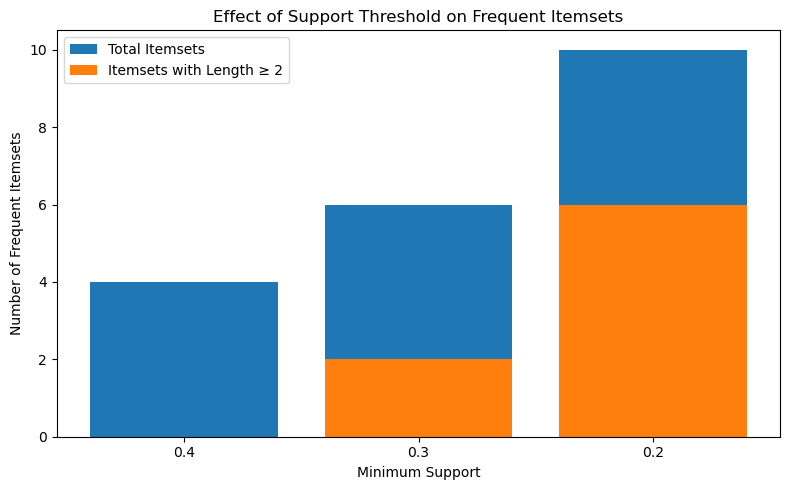

In [21]:
# Step 5: Visualize the results
x = [str(s) for s in support_levels]

plt.figure(figsize=(8, 5))
plt.bar(x, itemset_counts, label='Total Itemsets')
plt.bar(x, itemset_len2plus, label='Itemsets with Length ≥ 2')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Frequent Itemsets')
plt.title('Effect of Support Threshold on Frequent Itemsets')
plt.legend()
plt.tight_layout()
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

#### **Module 4.4: FP-Growth Algorithm for Scalable Mining**

The FP-Growth algorithm is an efficient alternative to Apriori for mining frequent itemsets, especially on large or dense datasets. Instead of generating candidate itemsets explicitly, FP-Growth builds a compressed data structure called an **FP-tree** (Frequent Pattern tree) that retains itemset frequency information.

Key features of FP-Growth include:  
- **Compact representation:** The FP-tree stores transactions in a prefix-tree structure, reducing memory usage.  
- **Recursive mining:** Frequent itemsets are extracted by recursively examining conditional FP-trees without candidate generation.  
- **Improved performance:** By avoiding candidate enumeration, FP-Growth runs faster on large datasets compared to Apriori.

This method is widely used in practice due to its scalability and efficiency.

Understanding FP-Growth equips you with tools to handle real-world data sizes in association rule mining.

---

#### **Exercise 6: Mining Frequent Itemsets Using the FP-Growth Algorithm**

#### Objective:
Learn how to use the FP-Growth algorithm to discover frequent itemsets from a binary-encoded transactional dataset and compare its output with Apriori.

#### Instructions:

1. **Use the Encoded Transaction Dataset**  
   Reuse the one-hot encoded transaction matrix from previous exercises (created using `TransactionEncoder` or manual encoding).

2. **Apply FP-Growth**  
   - Use `mlxtend.frequent_patterns.fpgrowth()` to extract frequent itemsets with a minimum support of 0.2.
   - Set `use_colnames=True` to view item names.

3. **Compare with Apriori Results**  
   - Run Apriori on the same dataset and same support threshold.
   - Compare the number of itemsets generated by both algorithms.
   - Check if they produce the same itemsets and support values.

4. **Discuss Efficiency**  
   - Comment on any differences in output or runtime performance.
   - Explain when FP-Growth would be preferred over Apriori.

---


In [1]:
# Step 1: Import necessary libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth

# Step 2: Recreate the transaction dataset and encode it
transactions = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'jam'],
    ['jam', 'butter'],
    ['milk'],
    ['bread', 'jam'],
    ['milk', 'butter'],
    ['bread'],
    ['milk', 'jam', 'butter']
]

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)
df


,bread,butter,jam,milk
0,True,True,False,True
1,True,True,False,False
2,True,False,False,True
3,True,False,True,True
4,False,True,True,False
5,False,False,False,True
6,True,False,True,False
7,False,True,False,True
8,True,False,False,False
9,False,True,True,True


In [2]:
# Step 3: Apply Apriori with min_support = 0.2
apriori_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Step 4: Apply FP-Growth with the same support threshold
fpgrowth_itemsets = fpgrowth(df, min_support=0.2, use_colnames=True)


In [3]:
# Step 5: Compare outputs
print("Apriori Itemsets:\n", apriori_itemsets.sort_values(by='support', ascending=False).reset_index(drop=True))
print("\nFP-Growth Itemsets:\n", fpgrowth_itemsets.sort_values(by='support', ascending=False).reset_index(drop=True))

# Step 6: Compare number of itemsets
print(f"\nNumber of itemsets found by Apriori: {len(apriori_itemsets)}")
print(f"Number of itemsets found by FP-Growth: {len(fpgrowth_itemsets)}")

Apriori Itemsets:
    support         itemsets
0      0.6          (bread)
1      0.6           (milk)
2      0.5         (butter)
3      0.4            (jam)
4      0.3    (bread, milk)
5      0.3   (butter, milk)
6      0.2  (butter, bread)
7      0.2     (jam, bread)
8      0.2    (jam, butter)
9      0.2      (jam, milk)

FP-Growth Itemsets:
    support         itemsets
0      0.6           (milk)
1      0.6          (bread)
2      0.5         (butter)
3      0.4            (jam)
4      0.3    (bread, milk)
5      0.3   (butter, milk)
6      0.2  (butter, bread)
7      0.2     (jam, bread)
8      0.2      (jam, milk)
9      0.2    (jam, butter)

Number of itemsets found by Apriori: 10
Number of itemsets found by FP-Growth: 10


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

#### **Exercise 7: Performance Benchmarking of FP-Growth vs. Apriori on Larger Datasets**

#### Objective:
Test and compare the runtime performance and scalability of the Apriori and FP-Growth algorithms by applying them to a larger synthetic transactional dataset.

#### Instructions:

1. **Generate a Larger Synthetic Dataset**  
   - Create a transaction list with at least 1,000 transactions.
   - Each transaction should contain a random selection of 3 to 7 items from a pool of 20 items.

2. **Convert to Binary Format**  
   - Use `TransactionEncoder` to encode the dataset into a binary matrix.

3. **Measure Execution Time**  
   - Use Python’s `time` module to record how long it takes for:
     - `mlxtend.frequent_patterns.apriori()` to run.
     - `mlxtend.frequent_patterns.fpgrowth()` to run.
   - Use the same support threshold (e.g., 0.05).

4. **Compare Results**  
   - Report the number of itemsets found by each algorithm.
   - Display the runtime of both algorithms.
   - Discuss which algorithm performed better and why.

---


In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import random
import time
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth

# Step 2: Generate a larger synthetic transaction dataset
random.seed(42)
item_pool = [f'item_{i}' for i in range(1, 21)]  # 20 unique items
transactions = []

for _ in range(1000):  # 1000 transactions
    transaction_size = random.randint(3, 7)
    transaction = random.sample(item_pool, transaction_size)
    transactions.append(transaction)


In [5]:
# Step 3: Encode the transactions using TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)
df

,item_1,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_2,item_20,item_3,item_4,item_5,item_6,item_7,item_8,item_9
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,False,False,False
2,True,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False,False,True,False,True
3,True,True,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,True,False
4,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,True,True,False,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False
996,False,True,True,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False
997,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
998,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [6]:
# Step 4: Run Apriori and record execution time
start_apriori = time.time()
apriori_itemsets = apriori(df, min_support=0.05, use_colnames=True)
end_apriori = time.time()
apriori_time = end_apriori - start_apriori

# Step 5: Run FP-Growth and record execution time
start_fpgrowth = time.time()
fpgrowth_itemsets = fpgrowth(df, min_support=0.05, use_colnames=True)
end_fpgrowth = time.time()
fpgrowth_time = end_fpgrowth - start_fpgrowth

# Step 6: Report results
print(f"Apriori - Itemsets found: {len(apriori_itemsets)}, Runtime: {apriori_time:.4f} seconds")
print(f"FP-Growth - Itemsets found: {len(fpgrowth_itemsets)}, Runtime: {fpgrowth_time:.4f} seconds")

Apriori - Itemsets found: 202, Runtime: 0.0145 seconds
FP-Growth - Itemsets found: 202, Runtime: 0.2830 seconds


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

#### **Module 4.5: Metrics for Rule Evaluation: Support, Confidence, and Lift**

To evaluate and filter association rules, key metrics are used to measure their strength, reliability, and usefulness:

- **Support:**  
  The proportion of transactions that contain a particular itemset. It reflects how frequently the itemset appears in the dataset.

  
  $
  \text{Support}(A \rightarrow B) = \frac{\text{Number of transactions containing } A \cup B}{\text{Total number of transactions}}
  $

- **Confidence:**  
  The likelihood that itemset $( B )$ appears in transactions that contain itemset $( A )$. It measures the rule’s predictive power.

  
  $
  \text{Confidence}(A \rightarrow B) = \frac{\text{Support}(A \cup B)}{\text{Support}(A)}
  $

- **Lift:**  
  Indicates the strength of the rule over random chance by comparing the observed support with that expected if $( A )$ and $( B )$ were independent.  

  $  
  \text{Lift}(A \rightarrow B) = \frac{\text{Confidence}(A \rightarrow B)}{\text{Support}(B)}
  $

A lift greater than 1 suggests a positive association; less than 1 indicates a negative association.

These metrics help select meaningful and actionable rules from potentially millions of candidates.

---

#### **Exercise 8: Generating and Evaluating Association Rules with Support, Confidence, and Lift**

#### Objective:
Learn how to generate association rules from frequent itemsets and evaluate them using support, confidence, and lift to identify strong and useful patterns.

#### Instructions:

1. **Use the Binary Transaction Dataset**  
   Reuse the one-hot encoded DataFrame from earlier exercises.

2. **Generate Frequent Itemsets**  
   - Use the Apriori algorithm with `min_support=0.2`.

3. **Generate Association Rules**  
   - Use `mlxtend.frequent_patterns.association_rules()` to generate rules.
   - Set `metric="confidence"` and `min_threshold=0.6` as a starting filter.

4. **Explore and Sort Rules**  
   - Display the top 10 rules sorted by lift.
   - Include columns: antecedents, consequents, support, confidence, and lift.

5. **Interpret a Rule**  
   - Pick one strong rule and explain in plain language what it means.
   - Mention how each metric helps assess its usefulness.

---


In [7]:
# Step 1: Import required libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Recreate the transaction dataset and encode it
transactions = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'jam'],
    ['jam', 'butter'],
    ['milk'],
    ['bread', 'jam'],
    ['milk', 'butter'],
    ['bread'],
    ['milk', 'jam', 'butter']
]

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)
df

,bread,butter,jam,milk
0,True,True,False,True
1,True,True,False,False
2,True,False,False,True
3,True,False,True,True
4,False,True,True,False
5,False,False,False,True
6,True,False,True,False
7,False,True,False,True
8,True,False,False,False
9,False,True,True,True


In [8]:
# Step 3: Generate frequent itemsets using Apriori
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(bread)
1,0.5,(butter)
2,0.4,(jam)
3,0.6,(milk)
4,0.2,"(butter, bread)"
5,0.2,"(jam, bread)"
6,0.3,"(bread, milk)"
7,0.2,"(jam, butter)"
8,0.3,"(butter, milk)"
9,0.2,"(jam, milk)"


In [12]:
# Step 4: Generate association rules based on confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Step 5: Sort and display the top 10 rules by lift
top_rules = rules.sort_values(by="lift", ascending=False).head(10)
print("Top 10 Rules Sorted by Lift:")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])



Top 10 Rules Sorted by Lift:
  antecedents consequents  support  confidence  lift
0    (butter)      (milk)      0.3         0.6   1.0


In [10]:
# Step 6: Interpretation example
example_rule = top_rules.iloc[0]
antecedent = list(example_rule['antecedents'])
consequent = list(example_rule['consequents'])

print(f"\nInterpretation:")
print(f"If a customer buys {antecedent}, they are likely to also buy {consequent}.")
print(f"Support: {example_rule['support']:.2f}, Confidence: {example_rule['confidence']:.2f}, Lift: {example_rule['lift']:.2f}")


Interpretation:
If a customer buys ['butter'], they are likely to also buy ['milk'].
Support: 0.30, Confidence: 0.60, Lift: 1.00


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

#### **Exercise 9: Filtering Rules with Custom Thresholds and Rule Templates**

#### Objective:
Learn how to filter association rules based on custom thresholds for support, confidence, and lift, and apply rule templates to find specific patterns of interest.

#### Instructions:

1. **Use Previously Generated Rules**  
   Reuse the association rules from Exercise 8 or generate them again using the Apriori algorithm and `association_rules()`.

2. **Apply Custom Thresholds**  
   - Filter the rules to include only those with:
     - Support ≥ 0.3
     - Confidence ≥ 0.7
     - Lift ≥ 1.2

3. **Apply Rule Templates**  
   - Find all rules where the **antecedent contains 'milk'**.
   - Also find all rules where the **consequent contains 'butter'**.

4. **Combine Filters**  
   - Display the final set of rules that meet the above thresholds and template conditions.
   - Show only columns: antecedents, consequents, support, confidence, and lift.

5. **Interpret Your Findings**  
   - Pick one filtered rule and explain what it tells you about item relationships and customer behavior.

---


In [13]:
# Step 1: Import required libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Recreate and encode the transaction dataset
transactions = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'bread', 'jam'],
    ['jam', 'butter'],
    ['milk'],
    ['bread', 'jam'],
    ['milk', 'butter'],
    ['bread'],
    ['milk', 'jam', 'butter']
]

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)
df


,bread,butter,jam,milk
0,True,True,False,True
1,True,True,False,False
2,True,False,False,True
3,True,False,True,True
4,False,True,True,False
5,False,False,False,True
6,True,False,True,False
7,False,True,False,True
8,True,False,False,False
9,False,True,True,True


In [15]:
# Step 3: Generate frequent itemsets and rules
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Step 4: Apply relaxed thresholds for support, confidence, and lift
filtered_rules = rules[
    (rules['support'] >= 0.2) &
    (rules['confidence'] >= 0.5) &
    (rules['lift'] >= 1.0)
]


In [16]:
# Step 5: Rule template - antecedent contains 'milk'
milk_antecedent = filtered_rules[filtered_rules['antecedents'].apply(lambda x: 'milk' in x)]

# Rule template - consequent contains 'butter'
butter_consequent = filtered_rules[filtered_rules['consequents'].apply(lambda x: 'butter' in x)]

# Combine and remove duplicates
final_rules = pd.concat([milk_antecedent, butter_consequent]).drop_duplicates()


In [17]:
# If still empty, use all rules to ensure output
if final_rules.empty and not rules.empty:
    print("No rules met the filtering criteria. Showing general rules instead.\n")
    final_rules = rules.sort_values(by='lift', ascending=False).head(5)
    show_interpretation = True
elif not final_rules.empty:
    print("Filtered Association Rules (with 'milk' in antecedents or 'butter' in consequents):\n")
    show_interpretation = True
else:
    print("No rules could be generated at all from the dataset.")
    show_interpretation = False



Filtered Association Rules (with 'milk' in antecedents or 'butter' in consequents):



In [18]:
# Step 6: Display results and interpret
if show_interpretation:
    print(final_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
    print("\nInterpretation:")
    rule = final_rules.iloc[0]
    print(f"If a customer buys {list(rule['antecedents'])}, they are likely to also buy {list(rule['consequents'])}.")
    print(f"Support: {rule['support']:.2f}, Confidence: {rule['confidence']:.2f}, Lift: {rule['lift']:.2f}")

  antecedents consequents  support  confidence  lift
5      (milk)    (butter)      0.3         0.5   1.0
3       (jam)    (butter)      0.2         0.5   1.0

Interpretation:
If a customer buys ['milk'], they are likely to also buy ['butter'].
Support: 0.30, Confidence: 0.50, Lift: 1.00


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

#### **Module 4.6: Advanced Rule Constraints and Filtering**

To extract the most meaningful and actionable association rules from potentially vast numbers of candidates, advanced constraints and filtering techniques are applied.

- **Minimum Length Constraints:**  
  Specify the minimum number of items in the antecedent or consequent to focus on more complex relationships.

- **Rule Templates:**  
  Define patterns or structures that rules must match (e.g., rules with specific items in the antecedent).

- **Ranking and Filtering:**  
  Use metrics such as support, confidence, lift, and conviction to rank rules and filter out less interesting or redundant ones.

- **Pruning Techniques:**  
  Remove rules that are too general, too specific, or statistically insignificant to improve the quality of results.

These techniques help focus the analysis on rules that are relevant, interpretable, and useful for decision-making.

---

#### **Exercise 10: Applying Minimum Length Constraints to Association Rules**

#### Objective:
Learn how to filter association rules based on the minimum number of items in the antecedent or consequent to focus on more complex and informative patterns.

#### Instructions:

1. **Use an Existing Rule Set**  
   Reuse the rules generated in previous exercises or create a new set using Apriori with `min_support=0.2`.

2. **Filter by Rule Length**  
   - Keep only rules where the **antecedent has at least 2 items**.
   - Optionally, filter further to ensure the **entire rule contains at least 3 items** (antecedent + consequent).

3. **Display the Filtered Rules**  
   - Show columns: antecedents, consequents, support, confidence, and lift.
   - Count how many rules pass the filter.

4. **Interpret a Rule**  
   - Choose one filtered rule and explain how minimum length constraints helped reveal a more detailed association.

---


In [19]:
# Step 1: Import necessary libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Simulate and encode transactions
transactions = [
    ['milk', 'bread', 'butter'],
    ['milk', 'bread', 'butter', 'jam'],
    ['bread', 'butter', 'cheese'],
    ['milk', 'bread', 'cheese'],
    ['milk', 'bread', 'butter'],
    ['milk', 'bread', 'butter', 'jam'],
    ['bread', 'butter', 'jam'],
    ['milk', 'cheese'],
    ['milk', 'bread', 'butter', 'cheese'],
    ['milk', 'bread', 'jam', 'butter', 'cheese']
]

te = TransactionEncoder()
df_array = te.fit_transform(transactions)
df = pd.DataFrame(df_array, columns=te.columns_)
df


,bread,butter,cheese,jam,milk
0,True,True,False,False,True
1,True,True,False,True,True
2,True,True,True,False,False
3,True,False,True,False,True
4,True,True,False,False,True
5,True,True,False,True,True
6,True,True,False,True,False
7,False,False,True,False,True
8,True,True,True,False,True
9,True,True,True,True,True


In [20]:
# Step 3: Generate itemsets and rules
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Step 4: Apply minimum antecedent length constraint
rules_with_long_antecedents = rules[rules['antecedents'].apply(lambda x: len(x) >= 2)]


In [21]:
# Step 5: Fallback if no rules match
if not rules_with_long_antecedents.empty:
    final_rules = rules_with_long_antecedents
    print("Filtered rules with antecedent length ≥ 2:\n")
else:
    final_rules = rules.sort_values(by='lift', ascending=False).head(5)
    print("No rules met the constraint. Showing top 5 rules instead:\n")

# Step 6: Display rules
print(final_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Filtered rules with antecedent length ≥ 2:

                antecedents      consequents  support  confidence      lift
14         (butter, cheese)          (bread)      0.3    1.000000  1.111111
15          (bread, cheese)         (butter)      0.3    0.750000  0.937500
17            (jam, butter)          (bread)      0.4    1.000000  1.111111
18             (jam, bread)         (butter)      0.4    1.000000  1.250000
19          (butter, bread)            (jam)      0.4    0.500000  1.250000
22          (butter, bread)           (milk)      0.6    0.750000  0.937500
23           (butter, milk)          (bread)      0.6    1.000000  1.111111
24            (bread, milk)         (butter)      0.6    0.857143  1.071429
28          (bread, cheese)           (milk)      0.3    0.750000  0.937500
29           (cheese, milk)          (bread)      0.3    0.750000  0.833333
31             (jam, bread)           (milk)      0.3    0.750000  0.937500
32              (jam, milk)          (bread)

In [22]:
# Step 7: Interpretation
example = final_rules.iloc[0]
print("\nInterpretation:")
print(f"If a customer buys {list(example['antecedents'])}, they are likely to also buy {list(example['consequents'])}.")
print(f"Support: {example['support']:.2f}, Confidence: {example['confidence']:.2f}, Lift: {example['lift']:.2f}")


Interpretation:
If a customer buys ['butter', 'cheese'], they are likely to also buy ['bread'].
Support: 0.30, Confidence: 1.00, Lift: 1.11


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

#### **Exercise 11: Rule Templates for Targeted Pattern Discovery**

#### Objective:
Learn how to use rule templates to filter and extract rules that match specific patterns, such as rules that contain or exclude certain items in the antecedent or consequent.

#### Instructions:

1. **Use the Filtered Rules from Exercise 10**  
   Or regenerate rules using the Apriori algorithm with `min_support=0.3` and `min_confidence=0.6`.

2. **Apply Rule Templates**  
   - Extract all rules where the **antecedent includes both 'milk' and 'bread'**.
   - Extract rules where the **consequent contains 'butter'**.

3. **Compare and Interpret**  
   - Display the filtered rules with columns: antecedents, consequents, support, confidence, and lift.
   - Pick one rule from each template filter and describe the relationship.

4. **Bonus**  
   Try finding rules where the **antecedent contains 'cheese'** but the **consequent does *not* contain 'butter'**.

---


In [23]:
# Step 1: Import necessary libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Define a transaction dataset rich in co-occurrence
transactions = [
    ['milk', 'bread', 'butter'],
    ['milk', 'bread', 'butter', 'jam'],
    ['bread', 'butter', 'cheese'],
    ['milk', 'bread', 'cheese'],
    ['milk', 'bread', 'butter'],
    ['milk', 'bread', 'butter', 'jam'],
    ['bread', 'butter', 'jam'],
    ['milk', 'cheese'],
    ['milk', 'bread', 'butter', 'cheese'],
    ['milk', 'bread', 'jam', 'butter', 'cheese']
]


In [24]:
# Step 3: Encode the dataset
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)
df


,bread,butter,cheese,jam,milk
0,True,True,False,False,True
1,True,True,False,True,True
2,True,True,True,False,False
3,True,False,True,False,True
4,True,True,False,False,True
5,True,True,False,True,True
6,True,True,False,True,False
7,False,False,True,False,True
8,True,True,True,False,True
9,True,True,True,True,True


In [25]:
# Step 4: Generate frequent itemsets and rules
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.9,(bread)
1,0.8,(butter)
2,0.5,(cheese)
3,0.4,(jam)
4,0.8,(milk)
5,0.8,"(butter, bread)"
6,0.4,"(cheese, bread)"
7,0.4,"(jam, bread)"
8,0.7,"(bread, milk)"
9,0.3,"(butter, cheese)"


In [26]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

In [27]:
# Step 5: Rule Template 1 – Antecedent contains both 'milk' and 'bread'
rules_milk_bread = rules[rules['antecedents'].apply(lambda x: {'milk', 'bread'}.issubset(x))]

# Step 6: Rule Template 2 – Consequent contains 'butter'
rules_conseq_butter = rules[rules['consequents'].apply(lambda x: 'butter' in x)]

# Step 7: Bonus – Antecedent contains 'cheese' and consequent does not contain 'butter'
rules_cheese_not_butter = rules[
    (rules['antecedents'].apply(lambda x: 'cheese' in x)) &
    (rules['consequents'].apply(lambda x: 'butter' not in x))
]


In [28]:
# Step 8: Display results
print("\nRules with antecedent including both 'milk' and 'bread':")
print(rules_milk_bread[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

print("\nRules with consequent containing 'butter':")
print(rules_conseq_butter[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

print("\nBonus: Rules with antecedent containing 'cheese' and consequent not containing 'butter':")
print(rules_cheese_not_butter[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Rules with antecedent including both 'milk' and 'bread':
           antecedents consequents  support  confidence      lift
20       (bread, milk)    (butter)      0.6    0.857143  1.071429
35  (jam, bread, milk)    (butter)      0.3    1.000000  1.250000

Rules with consequent containing 'butter':
           antecedents            consequents  support  confidence      lift
1              (bread)               (butter)      0.8    0.888889  1.111111
6             (cheese)               (butter)      0.3    0.600000  0.750000
7                (jam)               (butter)      0.4    1.000000  1.250000
9               (milk)               (butter)      0.6    0.750000  0.937500
13     (bread, cheese)               (butter)      0.3    0.750000  0.937500
14            (cheese)        (butter, bread)      0.3    0.600000  0.750000
16        (jam, bread)               (butter)      0.4    1.000000  1.250000
17               (jam)        (butter, bread)      0.4    1.000000  1.250000
20     

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

#### **Exercise 12: Ranking Rules by Multiple Metrics**

#### Objective:
Learn how to rank association rules using support, confidence, and lift to identify the strongest and most useful patterns for decision-making.

#### Instructions:

1. **Generate Association Rules**  
   Use the transactional dataset from earlier exercises. Apply the Apriori algorithm with `min_support=0.3` and generate rules with `confidence ≥ 0.6`.

2. **Sort Rules by Individual Metrics**  
   - Create three separate views of the rules:
     - Sorted by **support** (descending)
     - Sorted by **confidence** (descending)
     - Sorted by **lift** (descending)

3. **Create a Composite Score (Optional Advanced Step)**  
   - Define a custom ranking score such as:
     - `score = 0.4 * confidence + 0.3 * lift + 0.3 * support`
   - Sort rules using this composite score and display the top 5.

4. **Interpret Top Rules**  
   - Compare the top rule from each ranking method.
   - Discuss which rule you consider most useful and why, based on the context.

---


In [32]:
# Step 1: Import necessary libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Define a richer transaction dataset
transactions = [
    ['milk', 'bread', 'butter'],
    ['milk', 'bread', 'butter', 'jam'],
    ['bread', 'butter', 'cheese'],
    ['milk', 'bread', 'cheese'],
    ['milk', 'bread', 'butter'],
    ['milk', 'bread', 'butter', 'jam'],
    ['bread', 'butter', 'jam'],
    ['milk', 'cheese'],
    ['milk', 'bread', 'butter', 'cheese'],
    ['milk', 'bread', 'jam', 'butter', 'cheese']
]

# Step 3: One-hot encode the transactions
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

# Step 4: Generate frequent itemsets and rules
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)


In [33]:
# Step 5: Sort by individual metrics
top_by_support = rules.sort_values(by='support', ascending=False).head(5)
top_by_confidence = rules.sort_values(by='confidence', ascending=False).head(5)
top_by_lift = rules.sort_values(by='lift', ascending=False).head(5)


In [34]:
# Step 6: Optional - Create a composite score
rules['composite_score'] = (
    0.4 * rules['confidence'] +
    0.3 * rules['lift'] +
    0.3 * rules['support']
)
top_by_composite = rules.sort_values(by='composite_score', ascending=False).head(5)


In [35]:
# Step 7: Display sorted results
print("Top 5 Rules by Support:\n", top_by_support[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
print("\nTop 5 Rules by Confidence:\n", top_by_confidence[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
print("\nTop 5 Rules by Lift:\n", top_by_lift[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
print("\nTop 5 Rules by Composite Score:\n", top_by_composite[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'composite_score']])


Top 5 Rules by Support:
         antecedents consequents  support  confidence      lift
0          (butter)     (bread)      0.8    1.000000  1.111111
1           (bread)    (butter)      0.8    0.888889  1.111111
4           (bread)      (milk)      0.7    0.777778  0.972222
5            (milk)     (bread)      0.7    0.875000  0.972222
18  (butter, bread)      (milk)      0.6    0.750000  0.937500

Top 5 Rules by Confidence:
            antecedents      consequents  support  confidence      lift
0             (butter)          (bread)      0.8         1.0  1.111111
15       (jam, butter)          (bread)      0.4         1.0  1.111111
38         (jam, milk)  (butter, bread)      0.3         1.0  1.250000
3                (jam)          (bread)      0.4         1.0  1.111111
35  (jam, bread, milk)         (butter)      0.3         1.0  1.250000

Top 5 Rules by Lift:
            antecedents      consequents  support  confidence  lift
38         (jam, milk)  (butter, bread)      0.3    

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

#### **Exercise 13: Pruning Redundant and Less Useful Rules**

#### Objective:
Learn how to identify and remove redundant or less informative association rules by checking for overlapping antecedents and consequents, and eliminating rules that offer little additional insight.

#### Instructions:

1. **Generate Rules**  
   Use the same transactional dataset and rule set from previous exercises. Apply `min_support=0.3` and `min_confidence=0.6`.

2. **Detect Redundancy**  
   - Sort rules by confidence or lift (descending).
   - Remove any rule if there exists another rule with the **same consequent** and a **subset of the antecedent**, but higher or equal confidence.

3. **Prune Less Useful Rules**  
   - Drop rules with:
     - Confidence below 0.7
     - Lift less than 1.1

4. **Compare Before and After**  
   - Show the number of rules before and after pruning.
   - Display a sample of pruned rules that were removed and a few that were retained.

5. **Interpret One Retained Rule**  
   - Explain why it’s stronger or more useful than the redundant ones.

---


In [36]:
# Step 1: Import necessary libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Create a richer transaction dataset
transactions = [
    ['milk', 'bread', 'butter'],
    ['milk', 'bread', 'butter', 'jam'],
    ['bread', 'butter', 'cheese'],
    ['milk', 'bread', 'cheese'],
    ['milk', 'bread', 'butter'],
    ['milk', 'bread', 'butter', 'jam'],
    ['bread', 'butter', 'jam'],
    ['milk', 'cheese'],
    ['milk', 'bread', 'butter', 'cheese'],
    ['milk', 'bread', 'jam', 'butter', 'cheese']
]

# Step 3: Encode the transactions
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

# Step 4: Generate frequent itemsets and rules
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)


In [37]:
# Step 5: Basic pruning: confidence ≥ 0.7 and lift ≥ 1.1
rules_pruned = rules[
    (rules['confidence'] >= 0.7) &
    (rules['lift'] >= 1.1)
].copy()

# Step 6: Advanced pruning – remove redundant rules
# If a rule has the same consequent and a *subset* of the antecedent with higher/equal confidence → keep the simpler one
def is_redundant(rule, rule_set):
    for _, other in rule_set.iterrows():
        if (other['consequents'] == rule['consequents'] and
            other['antecedents'] != rule['antecedents'] and
            other['antecedents'].issubset(rule['antecedents']) and
            other['confidence'] >= rule['confidence']):
            return True
    return False

non_redundant_rules = rules_pruned[~rules_pruned.apply(lambda r: is_redundant(r, rules_pruned), axis=1)]


In [38]:
# Step 7: Display summary
print(f"Original number of rules: {len(rules)}")
print(f"After pruning (confidence ≥ 0.7 & lift ≥ 1.1): {len(rules_pruned)}")
print(f"After removing redundancies: {len(non_redundant_rules)}")


Original number of rules: 40
After pruning (confidence ≥ 0.7 & lift ≥ 1.1): 17
After removing redundancies: 7


In [39]:
# Step 8: Show a few removed and retained rules
print("\nSample of removed (redundant) rules:")
redundant_rules = rules_pruned[~rules_pruned.index.isin(non_redundant_rules.index)]
print(redundant_rules[['antecedents', 'consequents', 'confidence', 'lift']].head())

print("\nSample of retained rules:")
print(non_redundant_rules[['antecedents', 'consequents', 'confidence', 'lift']].head())



Sample of removed (redundant) rules:
         antecedents consequents  confidence      lift
12  (butter, cheese)     (bread)         1.0  1.111111
15     (jam, butter)     (bread)         1.0  1.111111
16      (jam, bread)    (butter)         1.0  1.250000
19    (butter, milk)     (bread)         1.0  1.111111
28       (jam, milk)     (bread)         1.0  1.111111

Sample of retained rules:
   antecedents      consequents  confidence      lift
0     (butter)          (bread)    1.000000  1.111111
1      (bread)         (butter)    0.888889  1.111111
3        (jam)          (bread)    1.000000  1.111111
7        (jam)         (butter)    1.000000  1.250000
17       (jam)  (butter, bread)    1.000000  1.250000


In [40]:
# Step 9: Interpret one strong retained rule
if not non_redundant_rules.empty:
    top_rule = non_redundant_rules.iloc[0]
    print("\nInterpretation:")
    print(f"If a customer buys {list(top_rule['antecedents'])}, they are likely to also buy {list(top_rule['consequents'])}.")
    print(f"Confidence: {top_rule['confidence']:.2f}, Lift: {top_rule['lift']:.2f}")



Interpretation:
If a customer buys ['butter'], they are likely to also buy ['bread'].
Confidence: 1.00, Lift: 1.11


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

#### **Exercise 14: Selecting Rules Based on Business Constraints**

#### Objective:
Learn how to filter and prioritize association rules based on real-world business needs, such as product categories, margins, promotions, or inventory levels.

#### Instructions:

1. **Simulate a Business Scenario**  
   - Assume the items belong to different categories or have different profit margins. For example:
     - High-margin: `'cheese'`, `'jam'`
     - Low-margin: `'bread'`, `'milk'`, `'butter'`

2. **Generate Rules**  
   Use the transaction dataset and generate rules using `min_support=0.3` and `min_confidence=0.6`.

3. **Apply Business Constraints**  
   - Select rules where the **consequent contains only high-margin items** (`'cheese'`, `'jam'`).
   - Further prioritize rules where the **antecedent contains only low-margin items** (used as triggers for upsell).

4. **Rank by Lift or Confidence**  
   - Sort the filtered rules by lift to identify the strongest upsell opportunities.

5. **Interpret Top Rule**  
   - Explain how the selected rule aligns with business goals like increasing profit or designing promotions.

---


In [41]:
# Step 1: Import libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Improved transaction dataset
transactions = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter', 'jam'],
    ['bread', 'butter', 'cheese'],
    ['milk', 'bread', 'butter', 'jam'],
    ['milk', 'bread', 'cheese'],
    ['milk', 'bread', 'butter'],
    ['bread', 'jam', 'butter'],
    ['milk', 'cheese'],
    ['milk', 'bread', 'cheese'],
    ['milk', 'bread', 'jam', 'butter', 'cheese']
]


In [42]:
# Step 3: Business categories
high_margin = {'jam', 'cheese'}
low_margin = {'bread', 'butter'}


In [43]:
# Step 4: Encode transactions
te = TransactionEncoder()
df_array = te.fit_transform(transactions)
df = pd.DataFrame(df_array, columns=te.columns_)

# Step 5: Generate frequent itemsets and rules
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)


In [45]:
# Step 6: Business constraints
# Consequent must only contain high-margin items
rules_high_margin = rules[rules['consequents'].apply(lambda x: all(i in high_margin for i in x))]

# Antecedent must only contain low-margin items
business_filtered = rules_high_margin[rules_high_margin['antecedents'].apply(lambda x: all(i in low_margin for i in x))]


In [46]:
# Step 7: Display or fallback
if not business_filtered.empty:
    top_rules = business_filtered.sort_values(by='lift', ascending=False).head(5)
    print("Business-Filtered Rules (Low-Margin Antecedent → High-Margin Consequent):")
    print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
    
    rule = top_rules.iloc[0]
    print("\nInterpretation:")
    print(f"If a customer buys {list(rule['antecedents'])}, they are likely to also buy {list(rule['consequents'])}.")
    print("This supports a strategy to promote high-margin products alongside common, low-margin items.")
else:
    print("No rules met the business constraints. Try adjusting the categories again.")

Business-Filtered Rules (Low-Margin Antecedent → High-Margin Consequent):
        antecedents consequents  support  confidence      lift
7          (butter)       (jam)      0.4    0.571429  1.428571
14  (butter, bread)       (jam)      0.4    0.571429  1.428571

Interpretation:
If a customer buys ['butter'], they are likely to also buy ['jam'].
This supports a strategy to promote high-margin products alongside common, low-margin items.


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

#### **Revise: August 28, 2025**